In [7]:
from optimization import optimize
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from oracle import Oracle, make_oracle
import seaborn as sns
from typing import List
from sklearn.linear_model import LogisticRegression

In [8]:
def optimize_sklearn(oracle):
    model = LogisticRegression(penalty="none", tol=1e-8, max_iter=10000, n_jobs=-1, fit_intercept=False)
    model.fit(oracle.X, oracle.Y.ravel())

    entropy_true = oracle.value(model.coef_.reshape(-1, 1))
    return entropy_true

In [9]:
def plot_vs_iter(data, true_ans: float, opt: str, linesearch_methods: List[str], title: str = None):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    for ls in linesearch_methods:
        data_to_plot = data[(data["OptMethod"] == opt) & (data["LineSearch"] == ls)]
        ax[0].plot(data_to_plot.num_iter, np.log10(np.abs(data_to_plot.entropy - true_ans)), label=f"{ls}")
        ax[1].plot(data_to_plot.num_iter, np.log10(data_to_plot.rk), label=f"{ls}")

    plt.suptitle(title, y=1.02)
    ax[0].set_ylabel("$\log(|F(w*) - F(w_{true})|)$")
    ax[1].set_ylabel("$\log\\left(\\frac{|\Delta F(w_k)|}{|\Delta F(w_0)|}\\right)$")
    ax[0].set_xlabel("Iteration number")
    ax[1].set_xlabel("Iteration number")  # ???
  
    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=6, bbox_to_anchor=(0.5, 0.97))
    plt.show()



def plot_vs_calls(data, true_ans: float, opt: str, linesearch_methods: List[str], title: str = None):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    for ls in linesearch_methods:
        data_to_plot = data[(data["OptMethod"] == opt) & (data["LineSearch"] == ls)]
        ax[0].plot(data_to_plot.oracle_calls, np.log10(np.abs(data_to_plot.entropy - true_ans)), label=f"{ls}")
        ax[1].plot(data_to_plot.oracle_calls, np.log10(data_to_plot.rk), label=f"{ls}")

    plt.suptitle(title, y=1.02)
    ax[0].set_ylabel("$\log(|F(w*) - F(w_{true})|)$")
    ax[1].set_ylabel("$\log\\left(\\frac{|\Delta F(w_k)|}{|\Delta F(w_0)|}\\right)$")
    ax[0].set_xlabel("Oracle call number")
    ax[1].set_xlabel("Oracle call number")  # ???

    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=6, bbox_to_anchor=(0.5, 0.97))
    plt.show()

def plot_vs_time(data, true_ans: float, opt: str, linesearch_methods: List[str], title: str = None):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    for ls in linesearch_methods:
        data_to_plot = data[(data["OptMethod"] == opt) & (data["LineSearch"] == ls)]
        ax[0].plot(data_to_plot.time, np.log10(np.abs(data_to_plot.entropy - true_ans)), label=f"{ls}")
        ax[1].plot(data_to_plot.time, np.log10(data_to_plot.rk), label=f"{ls}")

    plt.suptitle(title, y=1.02)
    ax[0].set_ylabel("$\log(|F(w*) - F(w_{true})|)$")
    ax[1].set_ylabel("$\log\\left(\\frac{|\Delta F(w_k)|}{|\Delta F(w_0)|}\\right)$")
    ax[0].set_xlabel("Time spent, s")
    ax[1].set_xlabel("Time spent, s")  # ???

    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=6, bbox_to_anchor=(0.5, 0.97))
    plt.show()

In [10]:
a1a = make_oracle("a1a.libsvm")
true_ans = optimize_sklearn(a1a)

In [11]:
sns.set()
sns.set_context("talk")
linesearch_methods = ["golden_section", "brent", "dbrent", "armijo", "wolfe"]

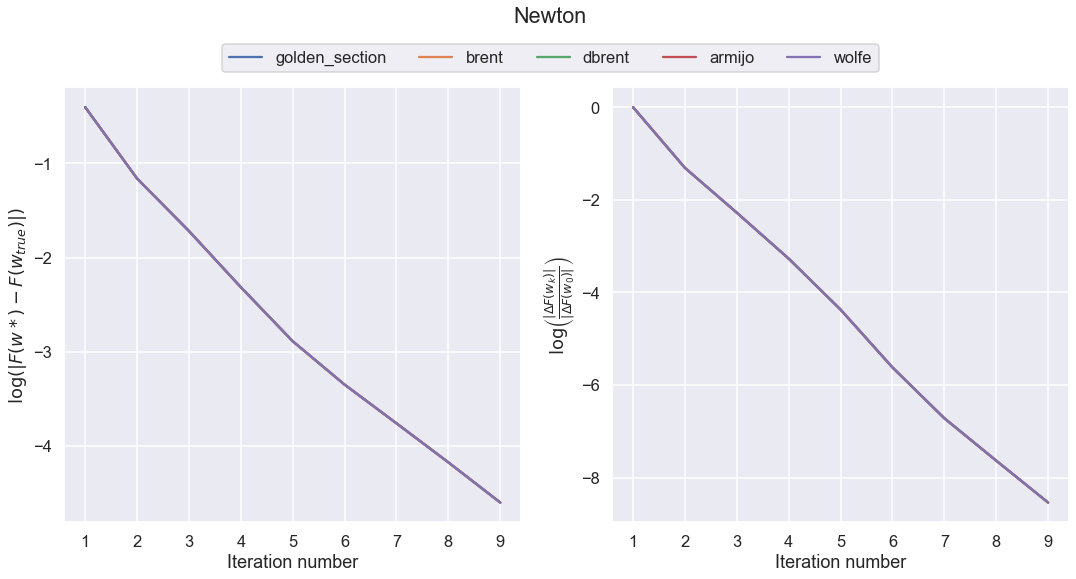

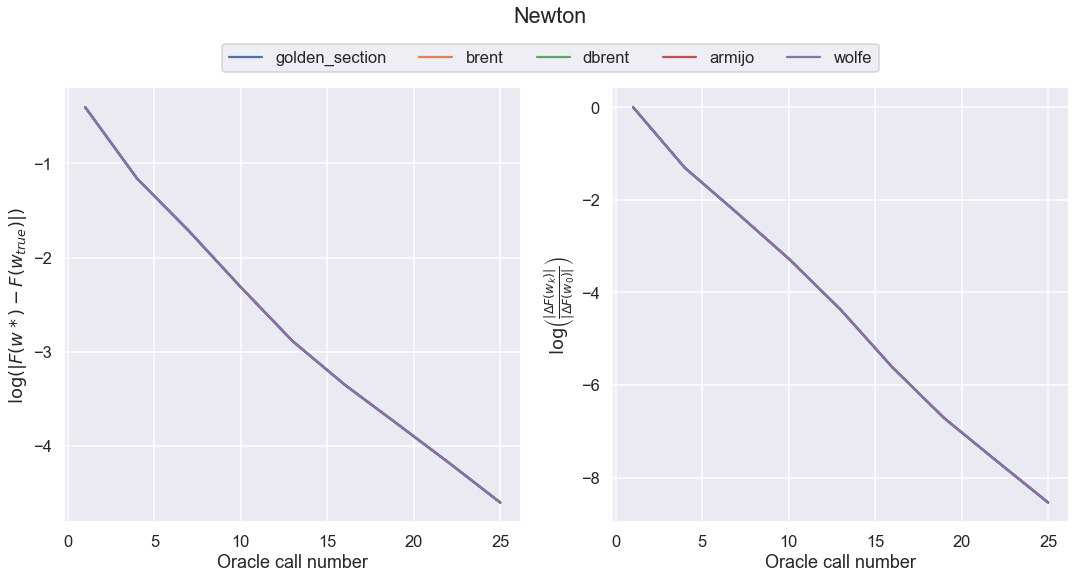

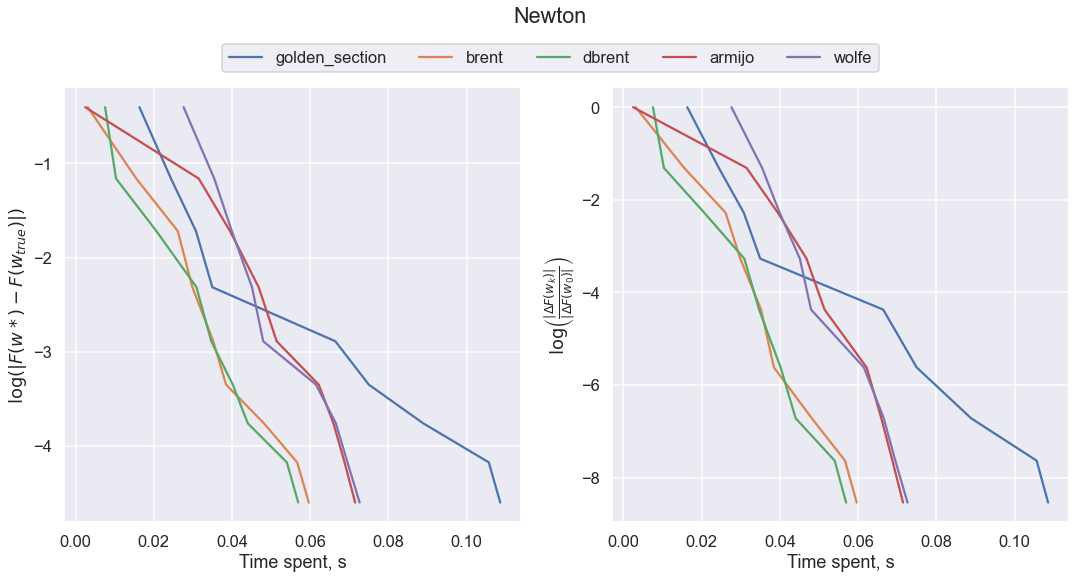

In [12]:
data = pd.read_csv("data/a1a_zeros.csv")
plot_vs_iter(data, true_ans, "newton", linesearch_methods, "Newton")
plot_vs_calls(data, true_ans, "newton", linesearch_methods, "Newton")
plot_vs_time(data, true_ans, "newton", linesearch_methods, "Newton")

Стоит отметить, что так как алгоритм всегда пытается сделать одиничный шаг и принимает его, если удовлетворены условия Армихо, то по факту, из графиков можно сделать вывод, что для **а1а** датасета метод Ньютона всегда идет по Армихо.

In [13]:
bc = make_oracle("breast-cancer_scale.libsvm")
true_ans = optimize_sklearn(bc)

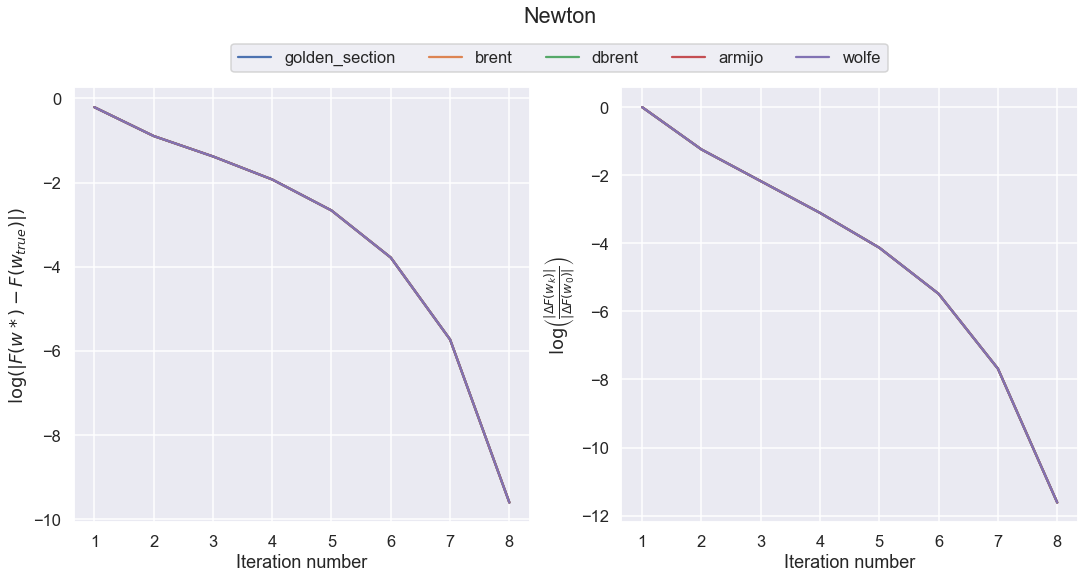

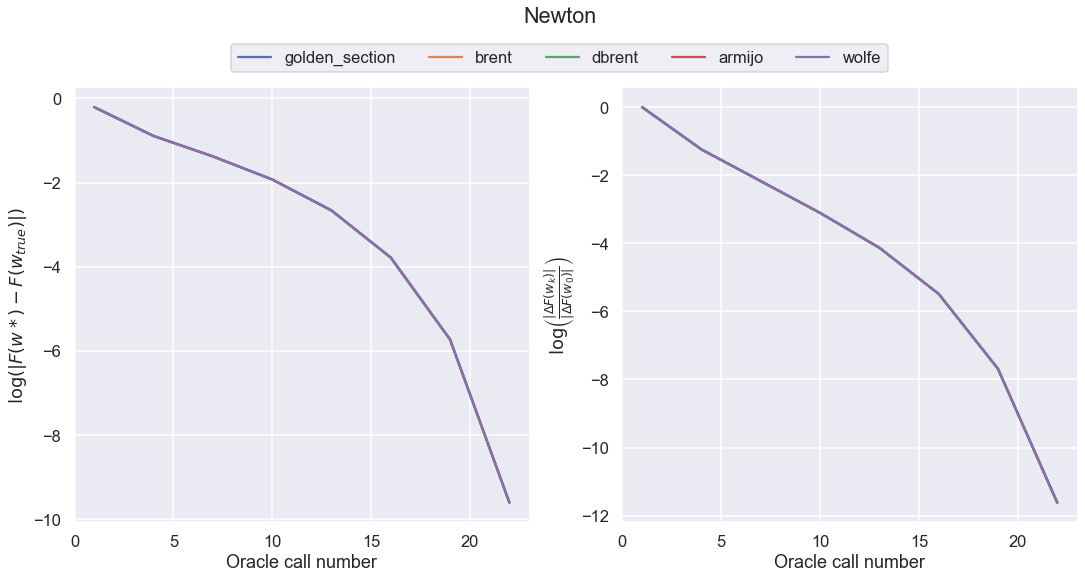

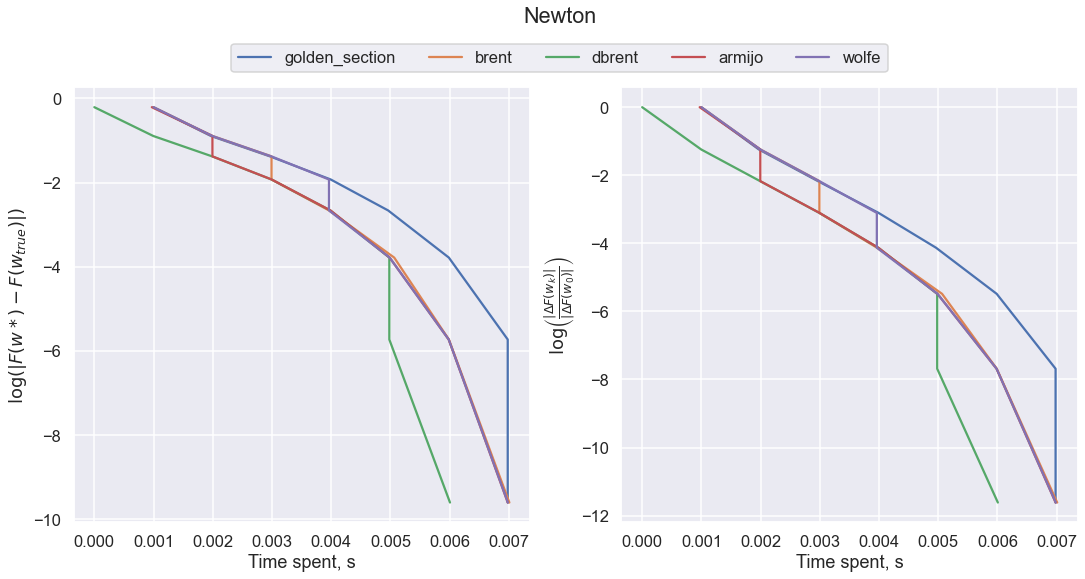

In [14]:
data = pd.read_csv("data/bc_scaled_zeros.csv")
plot_vs_iter(data, true_ans, "newton", linesearch_methods, "Newton")
plot_vs_calls(data, true_ans, "newton", linesearch_methods, "Newton")
plot_vs_time(data, true_ans, "newton", linesearch_methods, "Newton")

В целом, здесь ничего принципиального не изменилось, относительно предыдущего датасета.

Несколько поменялся характер сходимости: если раньше, судя по графику числа итераций, метод шел в минимум довольно прямолинейно, то здесь на старте метод несколько брал разгон, а потом попадал в область, из которой уже целенаправленно шел в минимум.